# Oppgavesamling: Global oppvarming

## Sammendrag av live kode

In [3]:
from pylab import pi

In [4]:
def finn_effekt(temperatur, areal):
    """Bruker Stefan-Boltzmann loven for å regne ut utstrålt effekt av et svart legeme.
    """
    sigma = 5.6704e-8  # W m^(-2) K^(-4)
    return sigma * (temperatur**4) * areal

def finn_temperatur(utstrålt_effekt, areal):
    """Bruker Stefan-Boltzmann loven for å regne ut temperaturen til et svart legeme basert på utstrålt effekt.
    """
    sigma = 5.6704e-8  # W m^(-2) K^(-4)
    temperatur_K = (utstrålt_effekt / (sigma*areal))**(1/4)
    return temperatur_K - 273.15

def finn_kuleskallareal(radius):
    """Regner ut arealet til et kuleskall med gitt radius.
    """
    return 4*pi*radius*radius

def finn_sirkelareal(radius):
    """Regner ut arealet til en sirkel med gitt radius"""
    return pi*radius*radius

In [10]:
soltemperatur = 5_778  # K
solradius = 696_340_000  # m
avstand_fra_jord_til_sol = 148_880_000_000  # m
jordradius = 6_371_000
albedo = 0.3

solareal = finn_kuleskallareal(solradius)
jordareal = finn_kuleskallareal(jordradius)
sol_utstrålt_effekt = finn_effekt(soltemperatur, solareal)
solkonstanten = sol_utstrålt_effekt / finn_kuleskallareal(avstand_fra_jord_til_sol)
jord_tverrsnittsareal = finn_sirkelareal(jordradius)

innstrålt_effekt_jord = jord_tverrsnittsareal * solkonstanten
jord_utstrålt_effekt = (1 - albedo) * innstrålt_effekt_fra_sol
jordtemperatur_C = finn_temperatur(jord_utstrålt_effekt, jordareal)

In [11]:
print(f"Jordens temperatur er {jordtemperatur_C:.2f} grader Celsius.")

Jordens temperatur er -17.57 grader Celsius.


## BONUS: Visualisere albedoens effekt

Her er litt kode for å visualisere effekten av albedo-verdier. Denne koden kan bli nyttig for noen av oppgavene.

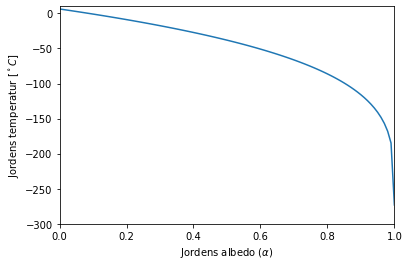

In [12]:
from pylab import arange, plot, show, xlabel, ylabel, xlim, ylim

# Lag en array med mulige albedo-verdier
albedo_verdier = arange(0, 1.01, 0.01)

# Regn ut jordtemperatur
innstrålt_effekt = (1 - albedo_verdier) * innstrålt_effekt_fra_sol
jordtemperatur = finn_temperatur(innstrålt_effekt, jordareal)

# Lag plott
plot(albedo_verdier, jordtemperatur)

# Pynt på plott
xlabel(r"Jordens albedo ($\alpha$)")
ylabel(r"Jordens temperatur [$^\circ C$]")
ylim(-300, 10)
xlim(0, 1)

# Vis frem plott
show()

# Oppgaver

### Oppgave 1

Vi kan modellere drivhuseffekten på mange måter, men nå skal vi bruke en av de enkleste modellene. Vi modellerer atmosfæren som et speil som reflekterer deler av varmestrålingen fra jorden tilbake. Litt som på figuren under:
<img src="bilder/energibudsjett_med_albedo_og_drivhuseffekt.png" width="400px">
Vi ser nå at den totale innstrålte effekten, $\text{P}_{\text{inn}}$ til jorden blir
\begin{equation}
\text{P}_{\text{inn}} = (1 - \alpha)\text{P}_{\text{sol}} + \text{P}_{\text{reflektert}},
\end{equation}
hvor $\alpha$ er jordens albedo, $\text{P}_{\text{sol}}$ er innstrålt effekt fra solen og $\text{P}_{\text{reflektert}}$ er effekten reflektert fra atmosfæren. Fra jordens energibalanse vet vi og at innstrålt og utstrålt effekt fra jorden er den samme, altså har vi at
\begin{equation}
\text{P}_{\text{inn}} = \text{P}_{\text{jord}}.
\end{equation}

Den siste delen i puslespillet vårt er da hva den reflekterte effekten er. Vi vet at atmosfæren reflekterer en andel $r$ av jordens utstrålte effekt, som vil si at
\begin{equation}
\text{P}_{\text{reflektert}} = r \text{P}_{\text{jord}}.
\end{equation}

Ved å kombinere disse likningene får vi sammenhengen
\begin{equation}
\text{P}_{\text{jord}} = \frac{(1 - \alpha) \text{P}_{\text{sol}}}{1 - r}.
\end{equation}


#### Oppgave 1 a)
Opprett en variabel `drivhuseffekt`. Denne skal representere $r$ i likningen over. Sett denne variabelen til en verdi mellom 0 og 1.

In [13]:
drivhuseffekt = 0.5


#### Oppgave 1b)
Opprett en variabel `utstrålt_effekt` som du setter lik $\text{P}_{\text{jord}}$ (**Hint:** Bruk likningen for $\text{P}_{\text{jord}}$ over med $\alpha=0.3$ og $\text{P}_{\text{sol}}$ lik `innstrålt_effekt_fra_sol`-variabelen vi definerte tidligere)



In [14]:
a = 0.3
utstrålt_effekt = ((1-a)*innstrålt_effekt_jord)/(1-drivhuseffekt)

#### Oppgave 1c)
Regn ut jordtemperaturen i Celsius og lagre denne i en variabel `jordtemperatur`.

In [15]:
jordtemperatur = finn_temperatur(utstrålt_effekt, jordareal)

#### Oppgave 1d)
Prøv forskjellige verdier for `drivhuseffekt`. Gjennomsnittstemperaturen til jorden er ca 15 °C, hvilken verdi må `drivhuseffekt` ha for å ha denne temperaturen?

Fasit: For at gjennomsnittstemperaturen til jorden skal være ca. 15 °C må drivhuseffekten være ca. 0.38. 

#### Oppgave 1e)
Bytt ut `drivhuseffekt`-variabelen med en array `drivhuseffekt_verdier` som består av verdier fordelt mellom 0 og 1 med 0.01 mellom hver verdi. Bruk denne variabelen til å lage et plot med jordtemperaturen som funksjon av drivhuseffekten. La plottet ha x-verdier mellom 0 og 1 og y-verdier mellom -300 og 500. (**Hint:** Du kan bruke `xlim` og `ylim` for å endre område aksene viser)

C:\Users\yngve\AppData\Local\Temp/ipykernel_16332/688602475.py:2: RuntimeWarning: divide by zero encountered in true_divide
  utstrålt_effekt = ((1-a)*innstrålt_effekt_jord)/(1-drivhuseffekt_verdier)


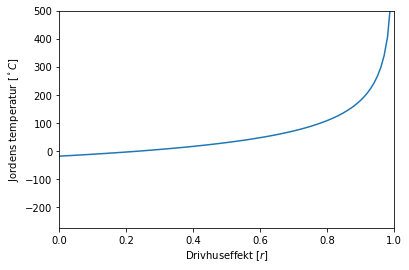

In [17]:
drivhuseffekt_verdier = arange(0, 1.01, 0.01)
utstrålt_effekt = ((1-a)*innstrålt_effekt_jord)/(1-drivhuseffekt_verdier)
jordtemperatur = finn_temperatur(utstrålt_effekt, jordareal)
plot(drivhuseffekt_verdier, jordtemperatur)
xlabel(r"Drivhuseffekt [$r$]")
ylabel(r"Jordens temperatur [$^\circ C$]")
xlim(0, 1)
ylim(-273, 500)
show()

#### Oppgave 1f)
Lag en funksjon `estimer_jordtemperatur(albedo, drivhuseffekt)` som tar inn jordens albedo, $\alpha$, og andelen reflektert varmestråling fra atmosfæren, $r$, og returnerer den estimerte jordtemperaturen.

In [18]:
def estimer_jordtemperatur(albedo, drivhuseffekt):
    utstrålt_effekt = ((1-albedo)*innstrålt_effekt_jord)/(1-drivhuseffekt)
    return finn_temperatur(utstrålt_effekt, jordareal) 

#### Oppgave 1g)
Lag en funksjon `plott_jordtemperatur_mot_drivhuseffekt(albedo)` som tar inn jordens albedo, $\alpha$, og lager et plott over jordents temperatur som funksjon av drivhuseffekten. La plottet ha x-verdier mellom 0 og 1 og y-verdier mellom -300 og 500. (**Hint:** Du kan la `drivhuseffekt`-parameteren til `estimer_jordtemperatur` være en array med verdier mellom 0 og 1.)

In [21]:
def plott_jordtemperatur_mot_drivhuseffekt(albedo): 
    drivhuseffekt_verdier = arange(0, 1.01, 0.01)
    plot(drivhuseffekt_verdier, estimer_jordtemperatur(albedo, drivhuseffekt_verdier))
    xlabel(r"Drivhuseffekt ($r$)")
    ylabel(r"Jordens temperatur [$^\circ C$]")
    xlim(0, 1)
    ylim(-300, 500)
    show()

#### Oppgave 1h)
Bruk `interact` fra `ipywidgets`-biblioteket for å lage et interaktivt program hvor jordens albedo velges med en glidebryter og basert på denne skal programmet vise frem et plott av jordtemperaturen som funksjon av drivhuseffekten.

Hvordan endrer kurven seg når du drar i glidebryteren? Hva skjer om du setter albedoen til 1? Og hvorfor får kurva den formen når albedoen er 1? 

In [22]:
from ipywidgets import interact

interact(plott_jordtemperatur_mot_drivhuseffekt, albedo=(0., 1.))

interactive(children=(FloatSlider(value=0.5, description='albedo', max=1.0), Output()), _dom_classes=('widget-…

<function __main__.plott_jordtemperatur_mot_drivhuseffekt(albedo)>

### Oppgave 2
Wiens forskyvningslov sier at intensiteten til strålingen fra et svart legeme er maksimal ved den bølgelengden $\lambda$ som tilfredsstiller ligningen 
$$\lambda=\frac{a}{T},$$
der $a=2.898 \cdot 10^{6} \text{nm}\cdot\text{K}$, og $T$ er legemets temperatur i Kelvin.

#### Oppgave 2a)
Lag en funksjon `vanligste_bølgelengde(temperatur)` som tar inn temperaturen til et svart legeme og bruker Wiens forskyvningslov for å returnere bølgelengden med maksimal intensitet.

In [23]:
def vanligste_bølgelengde(temperatur):
    a = 2.898*10**6
    return a/temperatur

#### Oppgave 2b)
Bruk funksjonen du lagde i 2a) for å regne ut den vanligste bølgelengden til solen og jorden. Tilsvarer noen av disse bølgelengdene synlig lys?

In [24]:
print(f"Den vanligste bølgelengden til solen er {vanligste_bølgelengde(soltemperatur)} nm.")
print(f"Den vanligste bølgelengden til jorden er {vanligste_bølgelengde(288)} nm.")

Den vanligste bølgelengden til solen er 501.55763239875387 nm.
Den vanligste bølgelengden til jorden er 10062.5 nm.
